In [1]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import cv2
import shutil
import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IG

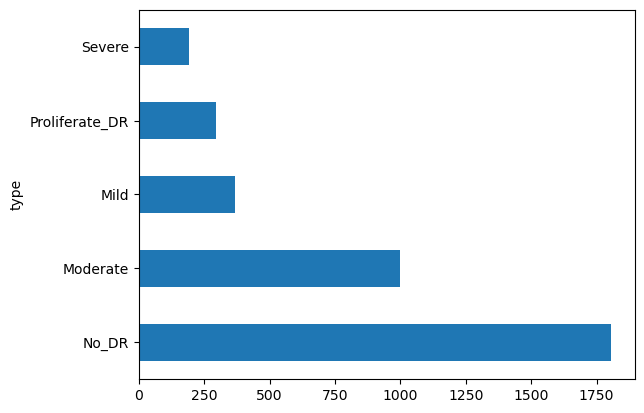

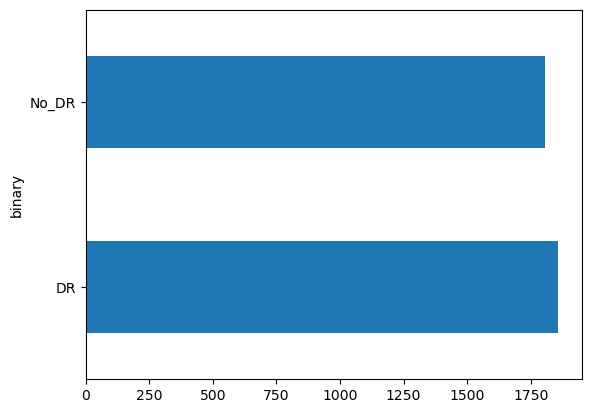

In [3]:
import os
df = pd.read_csv(r"C:\Users\91797\Downloads\archive (1)\train.csv")

diagnosis_binary = {
        0: 'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'}

diagnosis_classes = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df["binary"] = df["label"].map(diagnosis_binary.get)
df["type"] = df["label"].map(diagnosis_classes.get)
df.head()
df['type'].value_counts().plot(kind='barh')
plt.show()
df['binary'].value_counts().plot(kind='barh')
plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
!pip install imutils
from imutils import paths
from sklearn.utils import shuffle

In [5]:
data = []
labels = []
width,height=224,224

imagePaths = list(paths.list_images(r"C:\Users\91797\Downloads\archive (1)\gaussian_filtered_images\gaussian_filtered_images"))

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]   
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 224, 224, 3)
(3662, 5)


In [6]:
data = data / 255.0

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2929, 224, 224, 3)
Test images: (733, 224, 224, 3)
Train label: (2929, 5)
Test label: (733, 5)


In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_val.shape)
print("Train label:",y_train.shape)
print("Test label:",y_val.shape)

Train images: (2343, 224, 224, 3)
Test images: (586, 224, 224, 3)
Train label: (2343, 5)
Test label: (586, 5)


In [9]:
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras import layers

In [10]:
Vgg16 = VGG16(include_top=False, input_shape= (224,224,3)) 

Vgg16.trainable=False

In [11]:
model = Sequential()
model.add(Vgg16)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(32 , activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(5 , activation="sigmoid"))

model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy")] )

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,322,629 (62.27 MB)

 Trainable params: 1,607,941 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

history = model.fit(x_train , y_train , epochs=5 , batch_size=64,
                    validation_data=(x_val,y_val), verbose=1 , callbacks = callbacks)

Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 407s 11s/step - binary_accuracy: 0.7572 - loss: 0.5267 - val_binary_accuracy: 0.8922 - val_loss: 0.2804
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 411s 11s/step - binary_accuracy: 0.8810 - loss: 0.2979 - val_binary_accuracy: 0.8932 - val_loss: 0.2737
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 386s 10s/step - binary_accuracy: 0.8865 - loss: 0.2858 - val_binary_accuracy: 0.8932 - val_loss: 0.2580
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 347s 9s/step - binary_accuracy: 0.8927 - loss: 0.2650 - val_binary_accuracy: 0.8976 - val_loss: 0.2506
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 343s 9s/step - binary_accuracy: 0.8926 - loss: 0.2612 - val_binary_accuracy: 0.8983 - val_loss: 0.2538


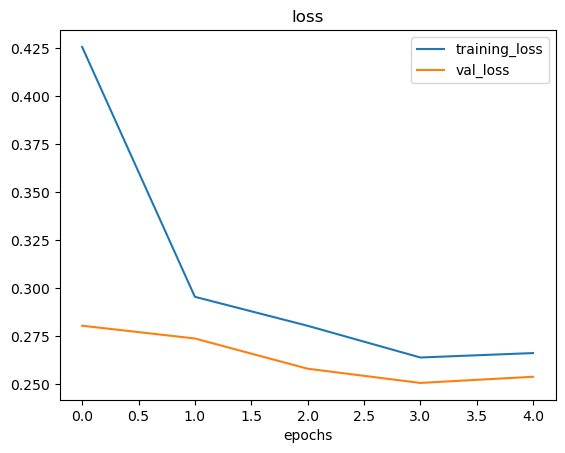

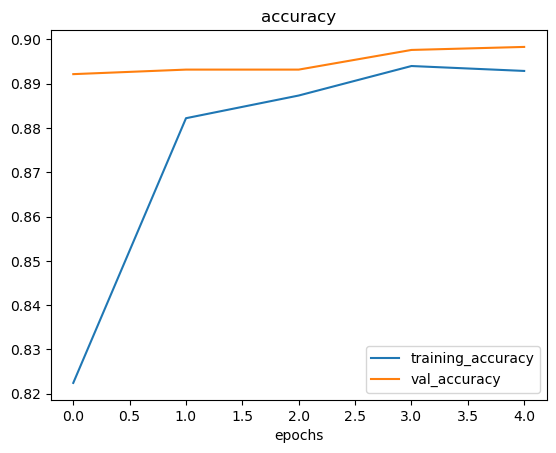

In [14]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["binary_accuracy"]
  val_accuracy = history.history["val_binary_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()
plot_curves(history)

In [15]:
score = model.evaluate(x_test,y_test)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step - binary_accuracy: 0.9202 - loss: 0.2143
23/23 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step


[0 0 1 0 0]
Prediction: NO_DR


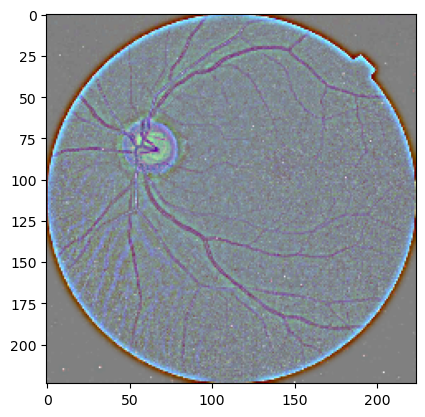

In [16]:
index =5
predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 

img = x_test[index]
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGBImg= cv2.resize(RGBImg,(224,224))

plt.imshow(RGBImg)
print(y_test[index]) # true
print(f"Prediction: {predictions[pred[index]]}") # predicted 

In [18]:
model.save("DRD.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[0.12378746 0.34762248 0.33087867 0.09567221 0.21141669]]
Level: Moderate


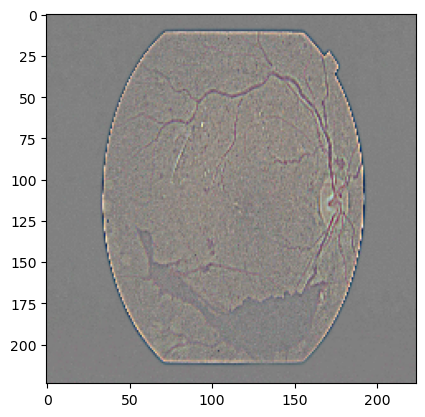

In [17]:
def predict_new(path):
    img = cv2.imread(path)
    level=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)
    print(predict)
    pr=list(predict[0])
    pred_level=level[pr.index(max(pr))]
    
    # print(f"Predicted: {predictions[pred[0]]}")
    print(f"Level: {pred_level}")

predict_new(r"C:\Users\91797\Downloads\archive (1)\gaussian_filtered_images\gaussian_filtered_images\Severe\fcc6aa6755e6.png")

In [ ]:
model.save("DRD")